In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

print(tf.__version__)

2.0.0-rc1


In [3]:
#Import from file
data = pd.read_csv("data.txt", names=['time', 'value', 'zero'])
#Drop null column
data.drop('zero', axis=1, inplace=True)
#Make time-column start from zero
data['time'] = data['time'].apply(lambda x : x - data['time'][0])
#Print first 5 rows
data.head(5)
#print(data.shape)

,time,value
0,0,0.866805
1,1,0.848815
2,2,0.843006
3,3,0.831201
4,4,0.820492


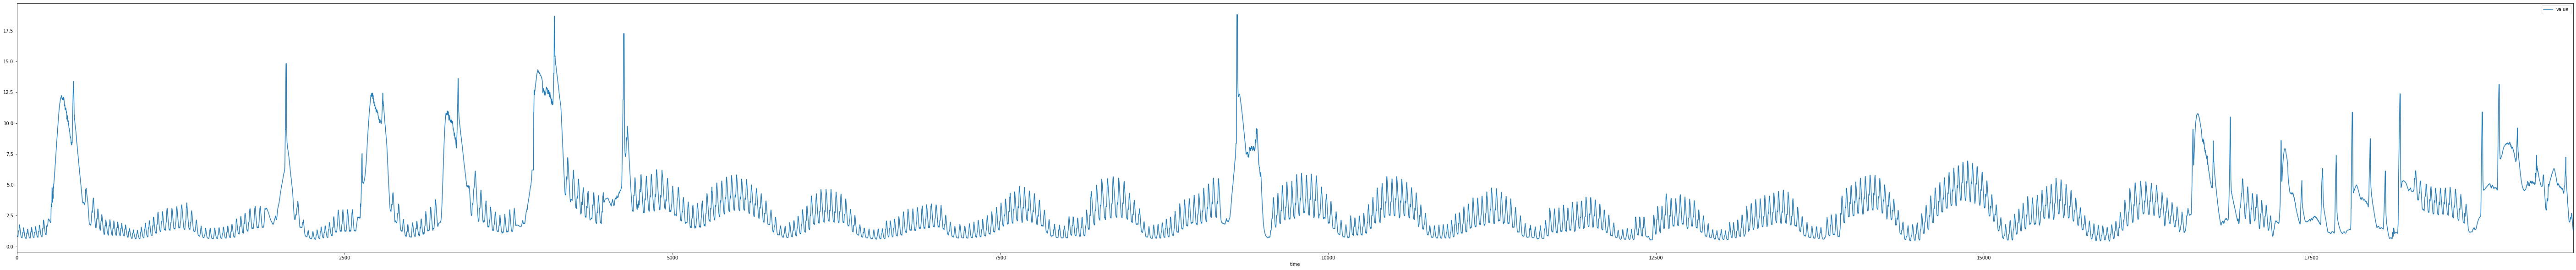

In [4]:
data.plot(x ='time', y='value', kind='line', figsize=(100,10))

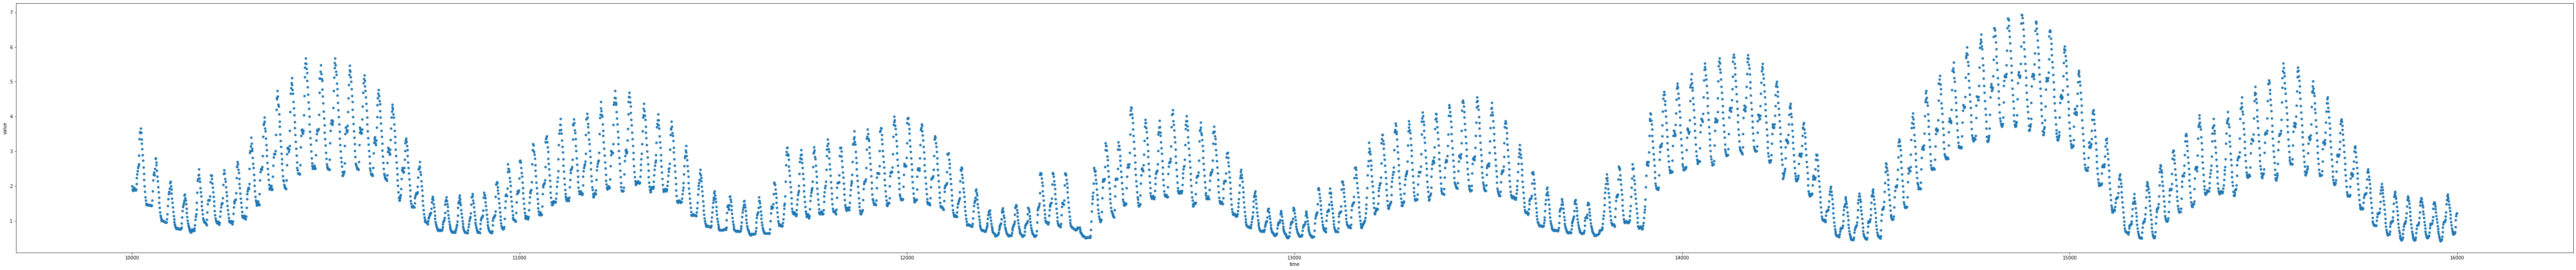

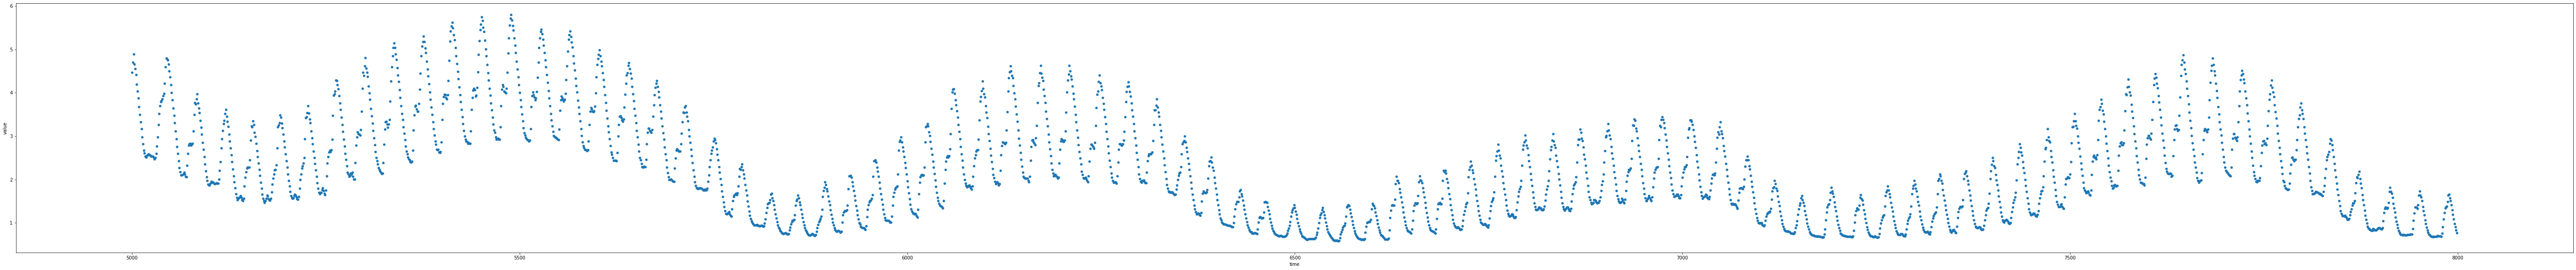

In [5]:
train = data.iloc[10000:16000]
test = data.iloc[5000:8000]
train.plot(x ='time', y='value', kind='scatter', figsize=(100,10))
test.plot(x ='time', y='value', kind='scatter', figsize=(100,10))

In [6]:
#Convert dataframe to nparray
train_data = train.to_numpy()#train.values
print(train_data.shape)
#Train on 5000, test on 1000
TRAIN_SPLIT=5000

#Normalize
#train_mean = train_data[:TRAIN_SPLIT].mean()
#train_std = train_data[:TRAIN_SPLIT].std()
#train_data = (train_data-train_mean)/train_std

#train_data = (train_data-train_data.min())/(train_data.max()-train_data.min())

print(train_data.shape)

(6000, 2)
(6000, 2)


In [9]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    dataset = dataset[:, [1]]
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i:i+target_size])
    return np.array(data), np.array(labels)

In [10]:
#Preduict next, using past 80
past_history = 500
future_target = 50

x_train_uni, y_train_uni = univariate_data(train_data, 0, TRAIN_SPLIT, past_history, future_target)
x_val_uni, y_val_uni = univariate_data(train_data, TRAIN_SPLIT, None, past_history, future_target)

In [11]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target value to predict')
print (y_train_uni[0])

Single window of past history
[[1.99721]
 [1.90745]
 [1.87128]
 [1.90212]
 [1.92605]
 [1.95673]
 [1.95334]
 [1.90003]
 [1.88247]
 [1.88271]
 [1.90592]
 [2.06542]
 [2.23563]
 [2.34521]
 [2.44206]
 [2.52678]
 [2.57962]
 [2.63054]
 [2.88719]
 [3.35474]
 [3.56335]
 [3.53156]
 [3.65846]
 [3.53941]
 [3.34378]
 [3.2302 ]
 [3.0709 ]
 [2.89177]
 [2.73476]
 [2.53734]
 [2.35306]
 [2.18661]
 [2.00556]
 [1.8446 ]
 [1.68487]
 [1.58773]
 [1.50296]
 [1.47324]
 [1.45813]
 [1.46195]
 [1.46387]
 [1.4724 ]
 [1.46573]
 [1.45307]
 [1.45235]
 [1.45896]
 [1.46036]
 [1.45918]
 [1.45147]
 [1.4349 ]
 [1.43234]
 [1.44849]
 [1.58862]
 [1.86165]
 [2.1675 ]
 [2.33507]
 [2.39341]
 [2.33528]
 [2.32147]
 [2.50014]
 [2.79429]
 [2.8107 ]
 [2.68483]
 [2.61024]
 [2.4517 ]
 [2.28402]
 [2.14212]
 [1.9791 ]
 [1.83247]
 [1.67561]
 [1.52754]
 [1.3824 ]
 [1.25397]
 [1.15339]
 [1.10172]
 [1.05951]
 [1.01799]
 [1.00161]
 [1.00679]
 [1.01464]]

 Target value to predict
[[1.00616 ]
 [1.00113 ]
 [0.990248]
 [0.983501]
 [0.97937 ]
 [0

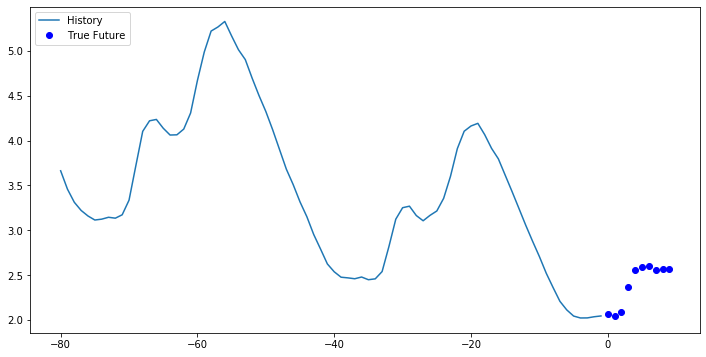

In [36]:
def create_time_steps(length):
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

def show_plot(plot_data, delta, title):
    labels = ['History', 'Ground truth', 'Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
          plt.plot(future, plot_data[i], marker[i], markersize=10,
                   label=labels[i])
        else:
          plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 0]), label='History')
    plt.plot(np.arange(num_out)/1, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/1, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()
    
for x, y in val_univariate.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [37]:
BATCH_SIZE = 128
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [38]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(future_target)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [40]:
EVALUATION_INTERVAL = 200
EPOCHS = 30

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/30
200/200 [==============================] - 9s 44ms/step - loss: 1.6066 - val_loss: 0.8616
Epoch 2/30
200/200 [==============================] - 7s 37ms/step - loss: 0.8051 - val_loss: 0.5753
Epoch 3/30
200/200 [==============================] - 7s 34ms/step - loss: 0.5628 - val_loss: 0.4214
Epoch 4/30
200/200 [==============================] - 7s 34ms/step - loss: 0.3978 - val_loss: 0.2653
Epoch 5/30
200/200 [==============================] - 7s 34ms/step - loss: 0.2947 - val_loss: 0.2085
Epoch 6/30
200/200 [==============================] - 7s 35ms/step - loss: 0.2372 - val_loss: 0.1842
Epoch 7/30
200/200 [==============================] - 7s 35ms/step - loss: 0.2103 - val_loss: 0.1713
Epoch 8/30
200/200 [==============================] - 7s 34ms/step - loss: 0.1982 - val_loss: 0.1698
Epoch 9/30
200/200 [==============================] - 7s 34ms/step - loss: 0.1901 - val_loss: 0.1622
Epoch 10/30
200/200 [===========================

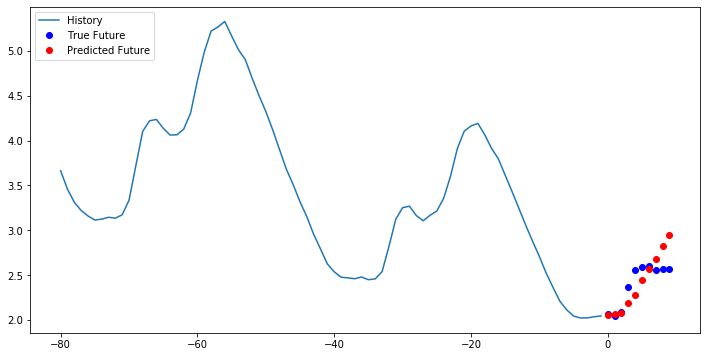

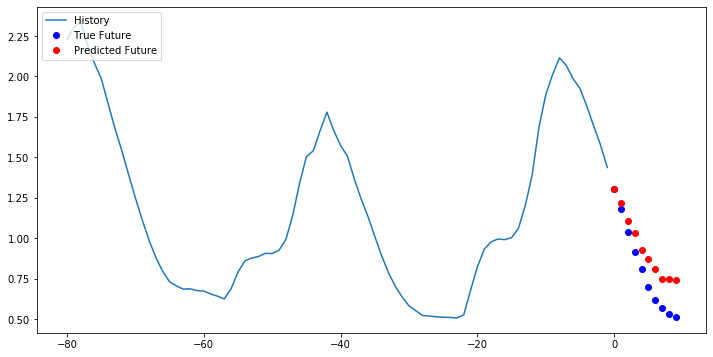

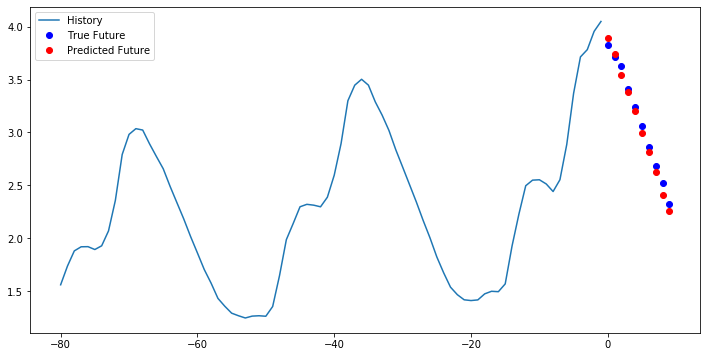

In [42]:
mpl.rcParams['figure.figsize'] = (17, 8)
mpl.rcParams['axes.grid'] = False
#for x, y in val_univariate.take(100):
#    plot = show_plot([x[future_target].numpy(), y[future_target].numpy(), simple_lstm_model.predict(x)[future_target]], future_target, 'Simple LSTM model')
#    plot.show()

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for x, y in val_univariate.take(3): # x is number one, y is function number two
    y_pred = simple_lstm_model.predict(x)[0]
    multi_step_plot(x[0], y[0], y_pred)
    print(mean_absolute_percentage_error(y[0], y_pred))
    # print(tf.keras.losses.MAPE(y[0], y_pred)) Doesnt seem to work as I want it to. Probably means that something is wrong.